# Comparing different surrogate models

Multiple surrogate models are implemented in HEBO, including:

- Gaussian processes (both from `gpytorch` and `GPy`)
- Deep ensemble
- SGLD
- Stochastic Variational Deep kernel learning
- Random forest
- Catboost

In this documentation, we use two toy function, the `torch.sinc` and `torch.sign` functions, to compare different models

In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from hebo.models.model_factory import get_model
torch.manual_seed(42)
np.random.seed(42)

In HEBO, numeric features and categorical features (encoded by integers) are explicity seperated as model input, we can create surrogate model from `hebo.model.model_factory.get_model` by 

```python
model = get_model(model_name, num_cont, num_enum, num_out, **algo_conf)
```

where `num_cont` is the dimension of numeric features, `num_enum` is the dimension of categorical features, and `num_out` is the dimension of output.

In [2]:
model_names = ['gp','gpy','gpy_mlp','psgld','svidkl','deep_ensemble','rf','catboost']

## Sinc function

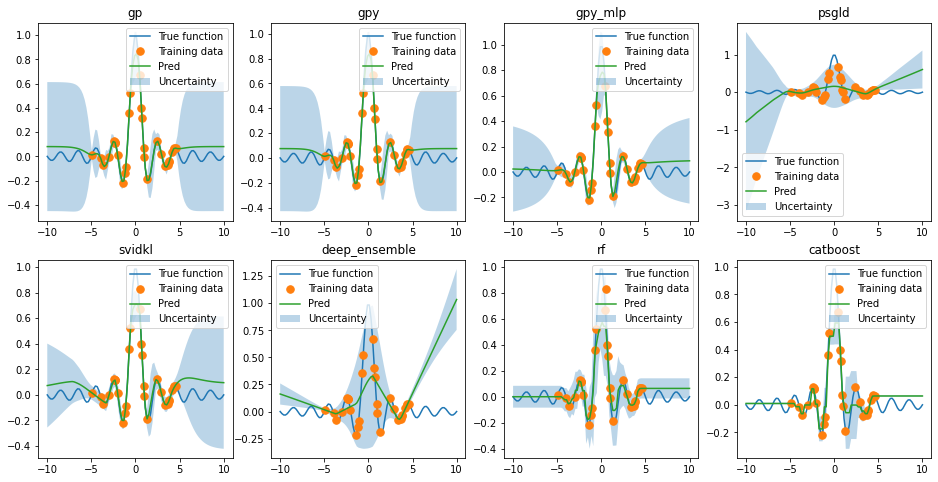

In [3]:
x_tr = 10 * torch.rand(30,1) - 5
y_tr = torch.sinc(x_tr)
x = torch.linspace(-10,10,100).view(-1,1)
y = torch.sinc(x)


img_size = 4
plt.figure(figsize = (img_size * 4, img_size * 2))
for i, model_name in enumerate(model_names):
    model = get_model(model_name, 1, 0, 1, num_epochs = 1000)
    model.fit(x_tr, None, y_tr)
    with torch.no_grad():
        py, ps2 = model.predict(x, None)
        ps      = ps2.sqrt()
        lcb     = py - 1.96 * ps
        ucb     = py + 1.96 * ps
    
    plt.subplot(2,4,i+1)
    plt.plot(x,y, label = 'True function')
    plt.plot(x_tr, y_tr, '.', markerSize = 15, label = 'Training data')
    plt.plot(x, py, label = 'Pred')
    plt.fill_between(x.view(-1), lcb.view(-1), ucb.view(-1), alpha = 0.3, label = 'Uncertainty')
    plt.legend()
    plt.title(model_name)

## Step function

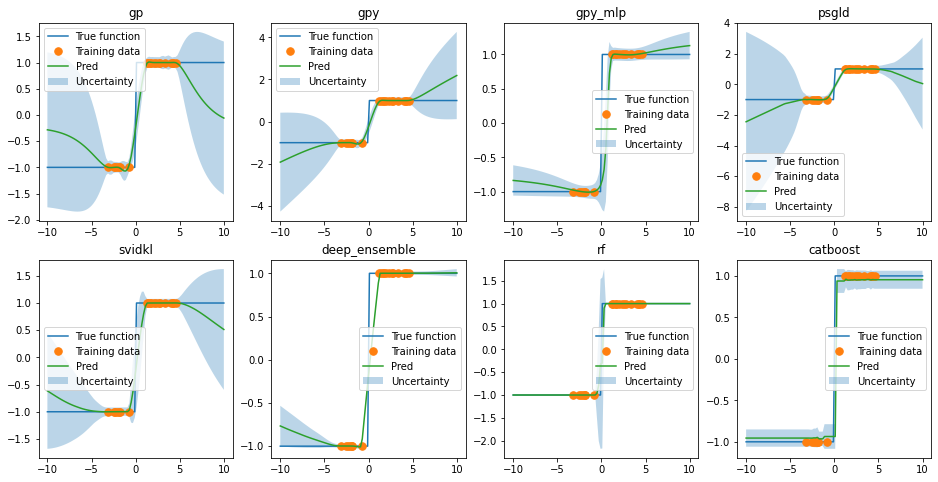

In [4]:
x_tr = 10 * torch.rand(20,1) - 5
y_tr = torch.sign(x_tr)
x = torch.linspace(-10,10,100).view(-1,1)
y = torch.sign(x)

img_size = 4
plt.figure(figsize = (img_size * 4, img_size * 2))
for i, model_name in enumerate(model_names):
    model = get_model(model_name, 1, 0, 1, num_epochs = 1000)
    model.fit(x_tr, None, y_tr)
    with torch.no_grad():
        py, ps2 = model.predict(x, None)
        ps      = ps2.sqrt()
        lcb     = py - 1.96 * ps
        ucb     = py + 1.96 * ps
    
    plt.subplot(2,4,i+1)
    plt.plot(x,y, label = 'True function')
    plt.plot(x_tr, y_tr, '.', markerSize = 15, label = 'Training data')
    plt.plot(x, py, label = 'Pred')
    plt.fill_between(x.view(-1), lcb.view(-1), ucb.view(-1), alpha = 0.3, label = 'Uncertainty')
    plt.legend()
    plt.title(model_name)

## Summary

We can see that Gaussian process based models work better for the sinc function, while neural network and tree-based models work better for the step function. It is up to the user to decide the best surrogate model for their own optimization tasks.

## Copyrigth statement

Copyright (C) 2020. Huawei Technologies Co., Ltd. All rights reserved.

This program is free software; you can redistribute it and/or modify it under
the terms of the MIT license.

This program is distributed in the hope that it will be useful, but WITHOUT ANY
WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A
PARTICULAR PURPOSE. See the MIT License for more details.
